In [1]:
# Import libraries
import requests
import os
import folium
import json
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [29]:
'''
Exercise 1
'''

capitals = pd.DataFrame({'Country' : ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Faroe Islands', 'Finland', 'France', 'Germany', 'Gibraltar', 'Greece', 'Guernsey', 'Hungary', 'Iceland', 'Ireland', 'Isle of Man', 'Italy', 'Jersey', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macedonia', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Svalbard and Jan Mayen', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom', 'Vatican'],
                         'Capital' : ['Tirana', 'Andorra la Vella', 'Vienna', 'Minsk', 'Brussels', 'Sarajevo', 'Sofia', 'Zagreb', 'Nicosia', 'Prague', 'Copenhagen', 'Tallinn', 'Torshavn', 'Helsinki', 'Paris', 'Belin', 'Gibraltar', 'Athens', 'St Peter Port', 'Budapest', 'Reykjavik', 'Dublin', 'Douglas', 'Rome', 'Saint Helier', 'Pristina', 'Riga', 'Vaduz', 'Vilnius', 'Luxembourg', 'Skopje', 'Valletta', 'Chisinau', 'Monaco', 'Podgorica', 'Amsterdam', 'Oslo', 'Warsaw', 'Lisbon', 'Bucharest', 'Moscow', 'San Marino', 'Belgrade', 'Bratislava', 'Ljublijana', 'Madrid', 'Longyearbyen', 'Stockholm', 'Berne', 'Kiev', 'London', 'Vatican'],
                         'Latitude' : [41.33, 42.51, 48.21, 53.90, 50.85, 43.85, 42.70, 45.81, 35.17, 50.09, 55.68, 59.44, 62.01, 60.17, 48.85, 52.52, 36.14, 37.98, 49.46, 47.50, 64.14, 53.33, 54.15, 41.89, 49.19, 42.67, 56.95, 47.14, 54.69, 49.61, 42.00, 35.90, 47.01, 43.73, 42.44, 52.37, 59.91, 52.23, 38.72, 44.43, 55.75, 43.94, 44.80, 48.15, 46.05, 40.42, 78.22, 59.33, 46.95, 50.45, 51.51, 41.90],
                         'Longitude' : [19.82, 1.52, 16.37, 27.57, 4.35, 18.36, 23.32, 15.98, 33.37, 14.42, 12.57, 24.75, -6.77, 24.84, 2.35, 13.41, -5.35, 23.72, -2.54, 19.04, -21.90, -6.25, -4.48, 12.48, -2.10, 21.17, 24.11, 9.52, 25.28, 6.13, 21.43, 14.51, 28.86, 7.42, 19.26, 4.89, 10.75, 21.01, -9.13, 26.11, 37.62, 12.45, 20.47, 17.11, 14.51, -3.70, 15.64, 18.06, 7.45, 30.52, -0.13, 12.45]})

# First we build the dataframe containing our information
df_unemployment_europe = pd.read_csv("Data/un_unemp.csv")
df_unemployment_europe.rename(columns = {'GEO' : 'Country', 'Value' : 'Percentage'}, inplace=True)
df_unemployment_europe.set_value(1112, 'Country', 'Germany')
df_unemployment_europe.set_value(1196, 'Country', 'The former Yugoslav Republic of Macedonia')
df_unemployment_europe.drop([1187, 1130], inplace = True)
df_unemployment_europe = df_unemployment_europe.query('UNIT == "Percentage of active population" and TIME == 2016')[['Country', 'Percentage']].loc[1100:1200]
df_unemployment_europe = df_unemployment_europe.convert_objects(convert_numeric=True)
df_unemployment_europe.reset_index(inplace=True)
df_unemployment_europe.drop('index', axis=1, inplace = True)
df_unemployment_europe = df_unemployment_europe.set_index('Country')

dset_eu = df_unemployment_europe['Percentage']

# Now we can build the map
dresden_coord = [51.050407, 13.737262]
europe_path = 'topojson/europe.geojson'
europe_json_data = json.load(open(europe_path))
europe_map = folium.Map(location=dresden_coord, tiles='Mapbox Bright', zoom_start=3)

europe_map.choropleth(
    geo_data = europe_path,
    data = dset_eu,
    fill_color = 'OrRd', 
    fill_opacity = 0.5, 
    line_opacity = 0.2,
    line_color = 'black',
    key_on = 'feature.properties.NAME',
    legend_name = "Unemployment rate in %",
    highlight = True,
    threshold_scale = [i for i in range(6)]
)

for index, row in capitals.iterrows():
    if (any(df_unemployment_europe.index==row['Country'])):
        location = [row['Latitude'], row['Longitude']]
        value = str(float(df_unemployment_europe.loc[row['Country']]))
        pop = row['Country'] + ": " + value + "% unemployment"
        folium.Marker(location, popup=pop).add_to(europe_map)

europe_map


C:\Users\arsal\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [212]:
'''
Exercise 2
'''

cantons = pd.DataFrame({
    'Canton' : ['Zurich', 'Berne', 'Lucerne', 'Uri', 'Schwytz', 'Obwald', 'Nidwald', 'Glaris', 'Zoug', 'Fribourg', 'Soleure', 'Bale-Ville', 'Bale-Campagne', 'Schaffhouse', 'Appenzell Rhodes-Exterieures', 'Appenzell Rhodes-Interieures', 'Saint-Gall', 'Grisons', 'Argovie', 'Thurgovie', 'Tessin', 'Vaud', 'Valais', 'Neuchatel', 'Geneve', 'Jura'],
    'Abreviation' : ['ZH', 'BE', 'LU', 'UR', 'SZ', 'OW', 'NW', 'GL', 'ZG', 'FR', 'SO', 'BS', 'BL', 'SH', 'AR', 'AI', 'SG', 'GR', 'AG', 'TG', 'TI', 'VD', 'VS', 'NE', 'GE', 'JU']
})

df_unemployment_switzerland = pd.read_csv("Data/ch_unemp.csv")
df_unemployment_switzerland = df_unemployment_switzerland.join(cantons, lsuffix='_df_unemployment_switzerland', rsuffix='_cantons')
df_unemployment_switzerland.rename(columns = {'Taux de chomage' : 'Percentage'}, inplace=True)
df_unemployment_switzerland.drop('Chomeurs inscrits', axis=1, inplace = True)
df_unemployment_switzerland.drop('Chomeurs inscrits.1', axis=1, inplace = True)
df_unemployment_switzerland.drop('Taux de chomage.1', axis=1, inplace = True)
df_unemployment_switzerland.drop('Canton_df_unemployment_switzerland', axis=1, inplace = True)
df_unemployment_switzerland.drop('Canton_cantons', axis=1, inplace = True)
df_unemployment_switzerland.reset_index(inplace=True)
df_unemployment_switzerland.drop('index', axis=1, inplace = True)
df_unemployment_switzerland = df_unemployment_switzerland.set_index('Abreviation')

dset_ch = df_unemployment_switzerland['Percentage']

# Building the map
sarmen_coord = [46.8442, 8.248]
swiss_path = "topojson/switzerland.geojson"
swiss_json_data = json.load(open(swiss_path))
swiss_map = folium.Map(location=sarmen_coord, tiles='Mapbox Bright', zoom_start=8)

swiss_map.choropleth(
    geo_data = swiss_json_data,
    data = dset_ch,
    fill_color = 'OrRd', 
    fill_opacity = 0.5, 
    line_opacity = 0.2,
    line_color = 'black',
    key_on = 'feature.id',
    legend_name = "Unemployment rate in %",
    highlight = True,
    threshold_scale = [i for i in range(6)]
)

swiss_map


In [218]:
#Used dataset containing long term unemployments rates and numbers in september 2017 by nationality


abbr=['ZH', 'BE', 'LU', 'UR', 'SZ', 'OW', 'NW', 'GL', 'ZG', 'FR', 'SO', 'BS', 'BL', 'SH', 'AR', 'AI', 'SG', 'GR', 'AG', 'TG', 'TI', 'VD', 'VS', 'NE', 'GE', 'JU']

df_unemployment_foreign_local = pd.read_csv("Data/ch_unemp_local_foreign.csv")
df_unemployment_foreign_local=df_unemployment_foreign_local.drop(["Mois","Septembre 2017.1","Total","Total.1"],axis=1)
df_unemployment_foreign_local=df_unemployment_foreign_local[:-1]
df_unemployment_foreign_local=df_unemployment_foreign_local.rename(columns={"Septembre 2017":"Unemployment Rate","Nationalité":"Nationality"})

unemployment_rate=df_unemployment_foreign_local["Unemployment Rate"]

foreign,swiss = unemployment_rate[::2], unemployment_rate[1::2]
foreign=[float(i) for i in foreign]
swiss=[float(i) for i in swiss]

difference = [round(float(np.abs(a-b)),3) for a,b in zip(foreign,swiss)]

df_local_foreign = pd.Series(data=difference,index=abbr)



# Building the map
sarmen_coord = [46.8442, 8.248]
swiss_path = "topojson/switzerland.geojson"
swiss_json_data = json.load(open(swiss_path))
swiss_map = folium.Map(location=sarmen_coord, tiles='Mapbox Bright', zoom_start=8)

swiss_map.choropleth(
    geo_data = swiss_json_data,
    data = df_local_foreign,
    fill_color = 'OrRd', 
    fill_opacity = 0.5, 
    line_opacity = 0.2,
    line_color = 'black',
    key_on = 'feature.id',
    legend_name = "Unemployment rate difference (local vs foreign) in %",
    highlight = True,
    threshold_scale = [i for i in range(6)]
)

swiss_map

#Highest difference is in Jura, at least 5 %


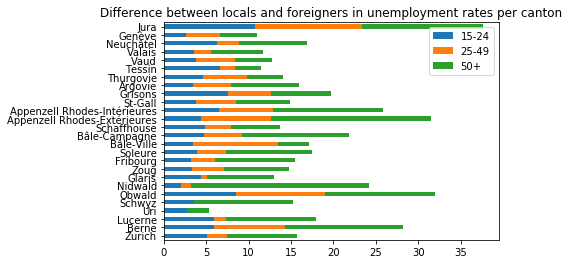

In [424]:
#Long term unemployed
df_unem_age_nationality=pd.read_csv("Data/ch_unemp_age_nationality.csv")
df_unem_age_nationality.drop("Classes dâge 15-24, 25-49, 50 ans et plus",axis=1,inplace=True)
df_unem_age_nationality.drop("Mois",axis=1,inplace=True)
df_unem_age_nationality=df_unem_age_nationality.rename(columns={"Nationalité":"Nationality","Unnamed: 3":"Age Group","Septembre 2017":"Unemployed"})

diff15To24=[]
diff25To49=[]
diff50=[]
totalsPerCanton=[]

def GetUnemployed(i):
    return int(df_unem_age_nationality.iloc[i]["Unemployed"])


for i in range(len(df_unem_age_nationality)):
    if((i%9==0)&(i+4<len(df_unem_age_nationality))):
        diff15To24.append(np.abs(GetUnemployed(i)-GetUnemployed(i+4)))
        diff25To49.append(np.abs(GetUnemployed(i+1)-GetUnemployed(i+5)))
        diff50.append(np.abs(GetUnemployed(i+2)-GetUnemployed(i+6)))
        totalsPerCanton.append(GetUnemployed(i+8))
        
cantons=df_unem_age_nationality['Canton'].unique()[:-1]

differencesPerCanton15To24=[x[0]/x[1]*100 for x in zip(diff15To24,totalsPerCanton)]
differencesPerCanton25To49=[x[0]/x[1]*100 for x in zip(diff25To49,totalsPerCanton)]
differencesPerCanton50=[x[0]/x[1]*100 for x in zip(diff50,totalsPerCanton)]

plotDF=pd.DataFrame({'15-24':differencesPerCanton15To24,'25-49':differencesPerCanton25To49,'50+':differencesPerCanton50},index=cantons)
plotDF.plot(kind='barh', stacked=True, title="Difference between locals and foreigners in unemployment rates per canton")